In [1]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

# <center>Extract via HSV<center>
These images need to visibly include the paper in the background

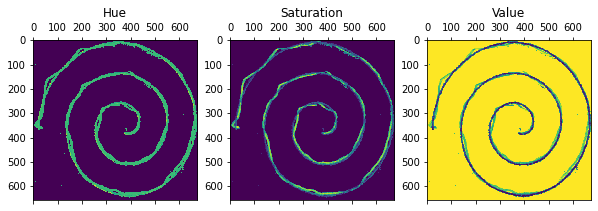

In [4]:
# read in the file
filename = 'sp1-H1.jpg'
folder_path = 'datasets/handPD_HT/test/healthy/'
path = os.path.join(folder_path, filename)
file = cv2.imread(path, 1)

origImg = file.copy()
# # iterate through all points in the image and threshold
nx = np.shape(origImg)[0]
ny = np.shape(origImg)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = origImg[x][y]
        if ((color[0] > 180) & (color[1] > 180) & (color[2] > 180)): # | (color[0] < 70):
            origImg[x][y][0] = 255
            origImg[x][y][1] = 255
            origImg[x][y][2] = 255

hsvImg = cv2.cvtColor(origImg, cv2.COLOR_BGR2HSV)
# hsvImg = cv2.applyColorMap(origImg, cv2.COLORMAP_JET)

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].matshow(hsvImg[:,:,0])
ax[1].matshow(hsvImg[:,:,1])
ax[2].matshow(hsvImg[:,:,2])
ax[0].title.set_text('Hue')
ax[1].title.set_text('Saturation')
ax[2].title.set_text('Value')

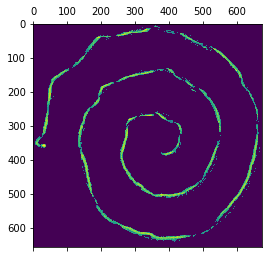

In [5]:
## Isolate the saturation channel on the original image
# then look to threshold
sImg = hsvImg[:,:,1]

for y in range(ny):
    for x in range(nx):
        if (sImg[x][y] <= 75) & (sImg[x][y] != 0):
            sImg[x][y] = 0

plt.matshow(sImg)

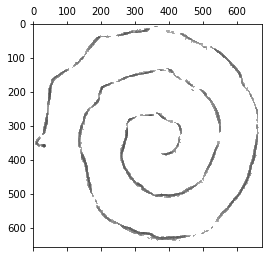

In [6]:
## dilate to remove noise
dilation_size = 1
dilateElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*dilation_size+1,2*dilation_size+1), anchor=(dilation_size,dilation_size))
sImg = cv2.dilate(sImg, dilateElement)

erosion_size = 2
erodeElement = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(2*erosion_size+1,2*erosion_size+1), anchor=(erosion_size,erosion_size))
sImg = cv2.erode(sImg, erodeElement)
sImg = cv2.dilate(sImg, dilateElement)

## convert back to grayscale then rgb
img_grayscale = cv2.bitwise_not(sImg)
final_img = cv2.cvtColor(img_grayscale, cv2.COLOR_GRAY2BGR)

plt.matshow(final_img)

# <center>Extract via ???<center>
These images appear to by strictly white in the background

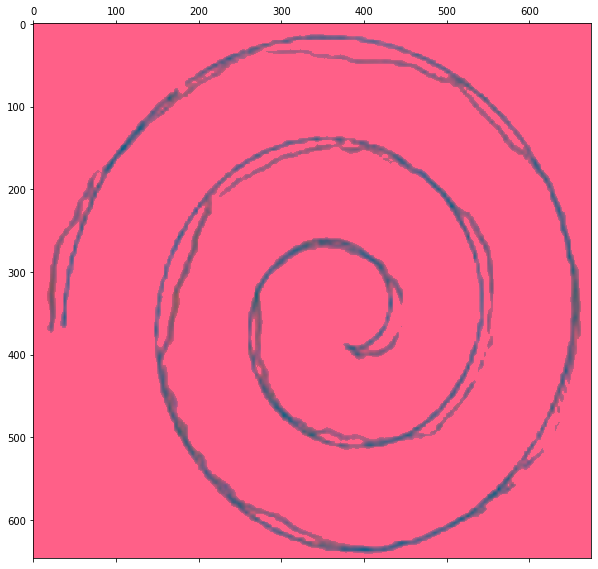

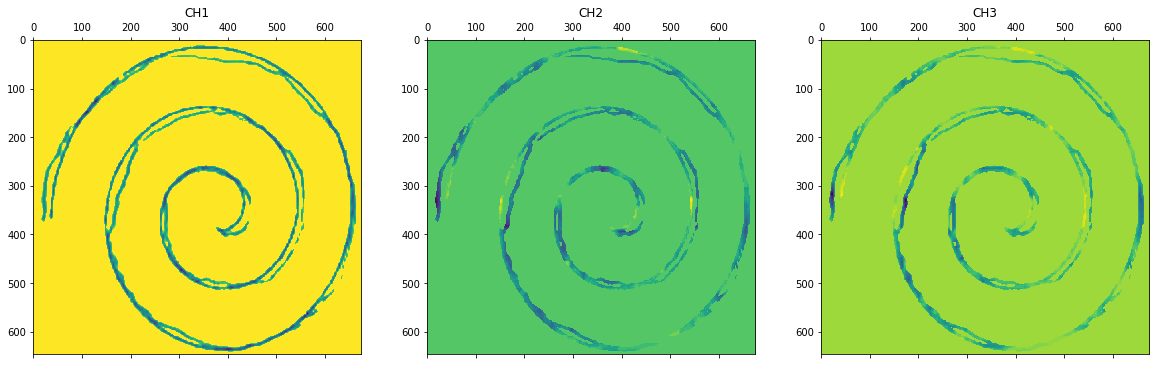

In [26]:
# read in the file
filename = 'sp4-H24.jpg'
folder_path = 'datasets/handPD_HT/test_2/'
path = os.path.join(folder_path, filename)
file = cv2.imread(path, 1)

origImg = file.copy()
# # iterate through all points in the image and threshold
nx = np.shape(origImg)[0]
ny = np.shape(origImg)[1]

for y in range(ny): # col
    for x in range(nx): # row
        color = origImg[x][y]
        if ((color[0] > 180) & (color[1] > 180) & (color[2] > 180)): # | (color[0] < 70):
            origImg[x][y][0] = 255
            origImg[x][y][1] = 255
            origImg[x][y][2] = 255

hsvImg = cv2.cvtColor(origImg, cv2.COLOR_BGR2LUV)
# hsvImg = cv2.applyColorMap(origImg, cv2.COLORMAP_JET)

plt.figure(figsize=(10,10))
plt.matshow(hsvImg, fignum=1)

fig, ax = plt.subplots(1,3, figsize=(20,20))
ax[0].matshow(hsvImg[:,:,0])
ax[1].matshow(hsvImg[:,:,1])
ax[2].matshow(hsvImg[:,:,2])
ax[0].title.set_text('CH1')
ax[1].title.set_text('CH2')
ax[2].title.set_text('CH3')